In [130]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [131]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta


# Reflect Tables into SQLAlchemy ORM

In [132]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [133]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [134]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [135]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [136]:
# Save references to each table
# Assign the station class to a variable called `Station`
Station = Base.classes.station

# Assign the measurement class to a variable called Measurement`
Measurement = Base.classes.measurement

In [137]:
# Create our session (link) from Python to the DB
session = Session(engine)
station = session.query(Station).all()

# Exploratory Precipitation Analysis

In [138]:
# Find the most recent date in the data set.
recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date_str 

'2017-08-23'

In [139]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
recent_date = dt.date.fromisoformat(recent_date_str)
recent_date 

datetime.date(2017, 8, 23)

In [140]:
# Calculate the date one year from the last date in data set.
year_ago_date = recent_date - dt.timedelta(days=365)
year_ago_date

datetime.date(2016, 8, 23)

In [141]:
# Perform a query to retrieve the date and precipitation scores for the last 12 months
prcp_results = session.query( Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago_date).\
    all()  
prcp_results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [142]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_results_df = pd.DataFrame(prcp_results, columns =["date", "prcp"])
prcp_results_df.head() 

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [143]:
# Sort the dataframe by date
sorted_prcp_results_df = prcp_results_df.groupby("date").apply(lambda x: x.sort_values("date")).reset_index(drop=True)


In [144]:
sorted_prcp_results_df.dropna(subset=['prcp'], inplace=True)
sorted_prcp_results_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79


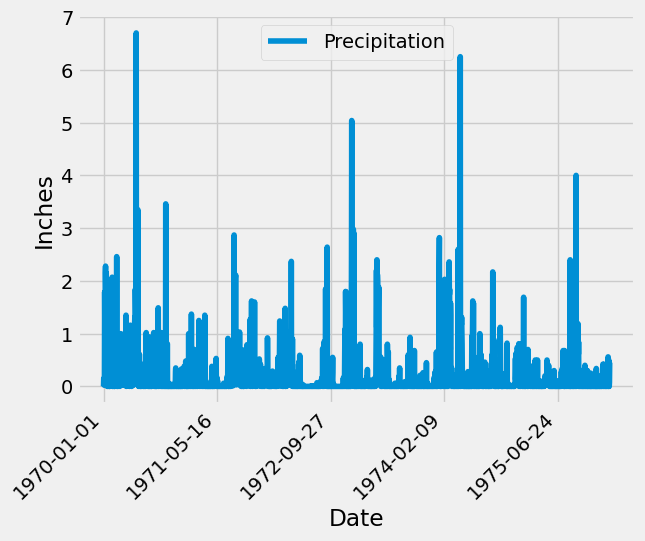

In [145]:
# Use Pandas Plotting with Matplotlib to plot the data

# Convert 'date' column to datetime type 
sorted_prcp_results_df['date'] = pd.to_datetime(sorted_prcp_results_df['date'])

# Filter data for the desired year (e.g., 2016)
start_date = '2016-08-23'
end_date = '2017-08-23'
filtered_df = sorted_prcp_results_df[(sorted_prcp_results_df['date'] >= start_date) & (sorted_prcp_results_df['date'] <= end_date)]

# plot the data 
filtered_df['prcp'].plot(label='Precipitation')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Inches')

# Add legend
plt.legend()

# Format x-axis tick labels
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


# Save the plot as an image
# plt.savefig('precipitation_plot.png')

# Display the plot
plt.show()

In [100]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = prcp_results_df['prcp'].count()
mean = prcp_results_df['prcp'].mean()
std = prcp_results_df['prcp'].std()
min_val = prcp_results_df['prcp'].min()
q25 = prcp_results_df['prcp'].quantile(0.25)
median = prcp_results_df['prcp'].median()
q75 = prcp_results_df['prcp'].quantile(0.75)
max_val = prcp_results_df['prcp'].max()

# display results 
summary_df = pd.DataFrame({
    'Count': [count],
    'Mean': [mean],
    'Std': [std],
    'Min': [min_val],
    '25%': [q25],
    '50%': [median],
    '75%': [q75],
    'Max': [max_val]
})

summary_df = summary_df.transpose()
summary_df

,0
Count,2021.000000
Mean,0.177279
Std,0.461190
Min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
Max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

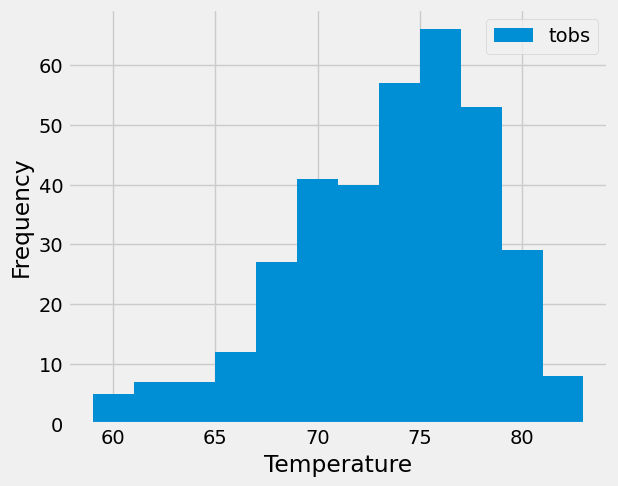

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()